# Descent Rate

A falling object will accelerate towards the ground until it reaches [terminal velocity](https://en.wikipedia.org/wiki/Terminal_velocity) when the force of gravity is balanced by upwards forces acting on it - namely, the drag force and bouyancy.

For our model, we will assume a zero bouyancy (the balloon has popped) and that the time to reach terminal velocity is negligible.

In [1]:
from preamble import *

In [2]:
Eq(F_d, F_g)

Eq(F_d, F_g)

In [3]:
_.replace(F_d, Rational(1/2) * rho * C_d * A * v**2).replace(F_g, m * g)

Eq(A*C_d*rho*v**2/2, g*m)

In [4]:
terminal_velocity = _.replace(A, pi * (D/2)**2)

In [5]:
terminal_velocity.solve(D**2)

Eq(D**2, 8*g*m/(pi*C_d*rho*v**2))

In [6]:
calc_velocity = lambdify([g,m,C_d,rho,D], sqrt(terminal_velocity.solve(v**2).rhs), "numpy")
calc_diameter = lambdify([g,m,C_d,rho,v], sqrt(_.rhs), "numpy")

In [7]:
KE = symbol_table.define('KE', 'Kinetic Energy')

In [8]:
Eq(KE,Rational(1/2) * m * v**2)

Eq(KE, m*v**2/2)

In [9]:
_.solve(v**2)

Eq(v**2, 2*KE/m)

In [10]:
calc_desired_velocity = lambdify([KE,m], sqrt(_.rhs), "numpy")

In [11]:
payload_mass = 1480 * units.g
balloon_mass = 1200 * units.g
total_mass = payload_mass + balloon_mass

kinetic_energy = np.linspace(20,100) * units.J

velocity = calc_desired_velocity(kinetic_energy, total_mass).to_base_units()

g = 9.86 * units.m / (units.s ** 2)
C_d = 0.78
rho = 1.22 * units.kg / (units.m ** 3)
diameter = calc_diameter(g, total_mass, C_d, rho, velocity).to_base_units()

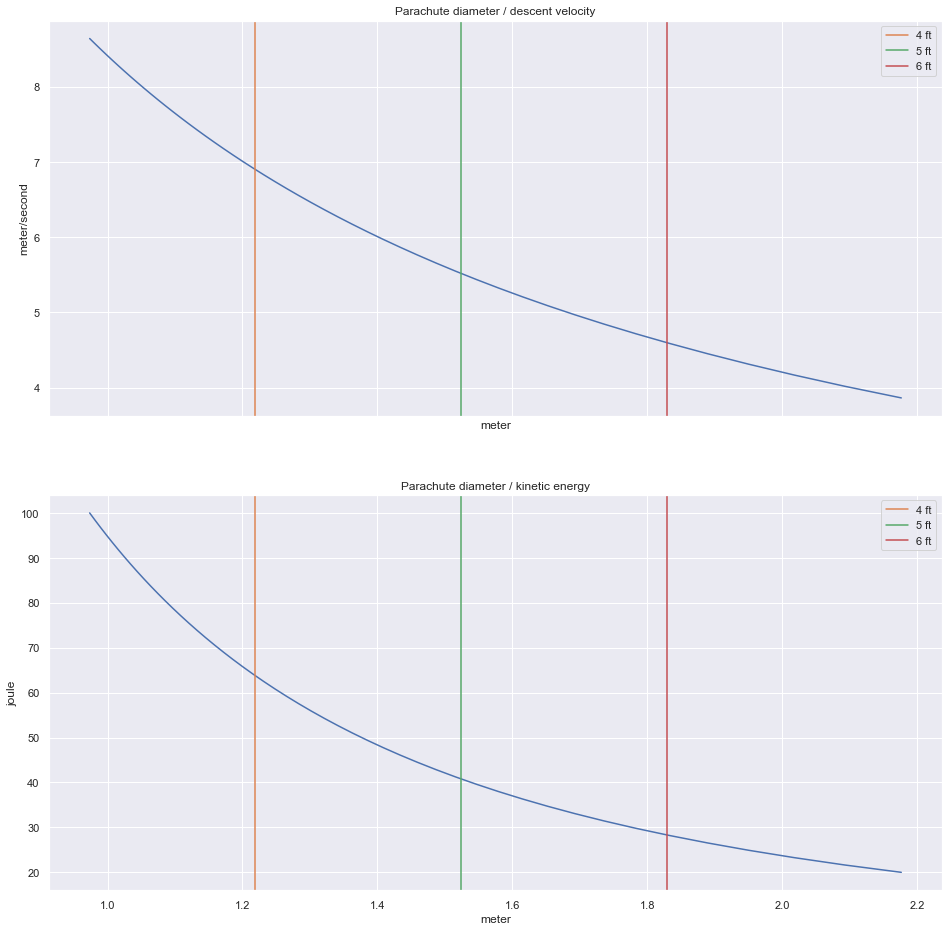

In [12]:
fig, axes = plt.subplots(2,1, sharex=True, figsize=(16,16))
axes[0].plot(diameter, velocity);
axes[0].set_title('Parachute diameter / descent velocity')
axes[1].plot(diameter, kinetic_energy);
axes[1].set_title('Parachute diameter / kinetic energy')

rocketman_chutes = [4,5,6] * units.ft

for ax in axes:
    for i, chute in enumerate(rocketman_chutes):
        ax.axvline(chute, color=f'C{i+1}', label=f'{chute:~P}')
    ax.legend()

In [13]:
calc_velocity(g, total_mass, C_d, rho, rocketman_chutes)

Magnitude,[66.47964683155732 53.183717465245856 44.31976455437154]
Units,gram0.5 meter2/(foot kilogram0.5 second)
